In [1]:
import yfinance as yf
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parámetros
empieza = '2020-01-01'
termina = '2023-06-08'
mkt = '^GSPC'
sp_500 = yf.download(mkt, start=pd.to_datetime(empieza), end=pd.to_datetime(termina) + timedelta(1)).reset_index()
sp_500["i_EMA200"] = sp_500["Close"].ewm(span=200, adjust=False).mean()
sp_500["i_EMA100"] = sp_500["Close"].ewm(span=100, adjust=False).mean()
sp_500["i_EMA50"] = sp_500["Close"].ewm(span=50, adjust=False).mean()
sp_500["i_EMA50_sobre_EMA200"] = np.where(sp_500["i_EMA50"] > sp_500["i_EMA200"], 1, 0)

#sp_500['Mercado'] = np.where((sp_500.i_EMA50 > sp_500.i_EMA200) & (sp_500.Close > sp_500.i_EMA100), "Alcista", "Bajista")
sp_500['Mercado'] = np.where(sp_500.Close > sp_500.i_EMA200, "Alcista", "Bajista")

sp_500['Color'] = np.where(sp_500.Close > sp_500.i_EMA200, 1, 0)


[*********************100%***********************]  1 of 1 completed


In [3]:
sp_500.groupby('Mercado').size()

Mercado
Alcista    563
Bajista    302
dtype: int64

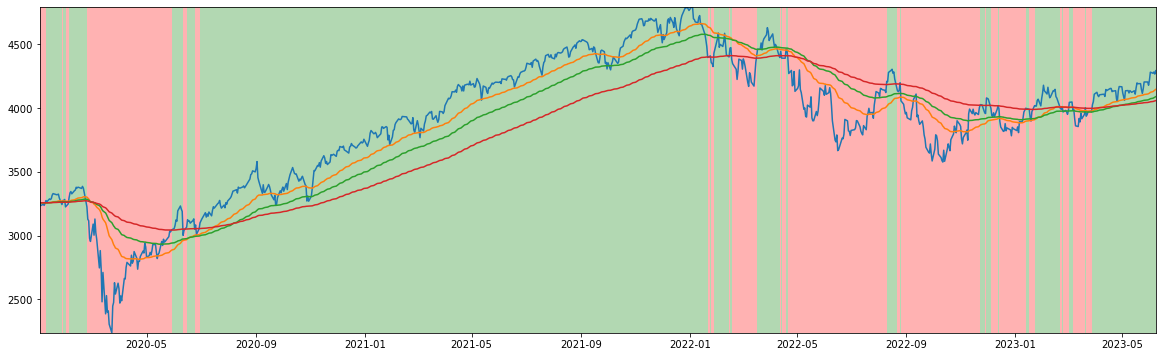

In [6]:
dias_inicio_cambio = sp_500[sp_500.Color != sp_500.Color.shift(1)].Date.values
dias_fin_cambio = dias_inicio_cambio[1:]
dias_fin_cambio = np.append(dias_fin_cambio, sp_500.tail(1)['Date'].values[0])
colores_cambio = sp_500[sp_500.Color != sp_500.Color.shift(1)].Color.values

plt.figure(figsize=(20, 6))
ax = plt.axes()
ax.plot(sp_500['Date'], sp_500['Close'])
ax.plot(sp_500['Date'], sp_500['i_EMA50'])
ax.plot(sp_500['Date'], sp_500['i_EMA100'])
ax.plot(sp_500['Date'], sp_500['i_EMA200'])

for di, de, c in zip(dias_inicio_cambio, dias_fin_cambio, colores_cambio):
    if c == 1:
        plt.axvspan(di, de, facecolor='green', alpha=0.3)
    if c == 0:
        plt.axvspan(di, de, facecolor='red', alpha=0.3)
        
ax.margins(0, tight=True)        
plt.show()
